# Modeling

In this notebook we
1. Load '../Data/tweets_eda.pickle' which is the output of exploratory data analysis.
2. Apply VADER for sentiment analysis to generate labels.
3. Apply LSTM, mLSTM, CNN & TCN models to predict sentiment with labels generated by VADER, on both word-level texts and character-level texts.
4. Apply LSTM, mLSTM, CNN & TCN models to predecit next character of tweets, and use the hidden state of this model to predict sentiment with labels generated by VADER, on character-level texts.
5. Compare models & come to the conclusion.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_pickle('../Data/tweets_eda.pickle')
df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 19 columns):
index                                                                       7628 non-null int64
Tweets                                                                      7628 non-null object
Has_predefined_movies                                                       7628 non-null object
Tweets_tokens                                                               7628 non-null object
Tweets_tokens_len                                                           7628 non-null int64
Tweets_tokens_remove_special_chars                                          7628 non-null object
Tweets_tokens_remove_special_chars_len                                      7628 non-null int64
Tweets_tokens_counter                                                       7628 non-null object
Tweets_tokens_counter_most_common                                           7628 non-null object
Tweets_tokens_remove_sp

There are 7628 data points.

### Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 24, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_line_plot(data):
    ax = get_sub_plot()
    sns.lineplot(data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()
    
def plot_dist_plot(data):
    ax = get_sub_plot()
    sns.distplot(data, ax = ax)
    plt.show()
    
def plot_point_plot(x, y, data):
    ax = get_sub_plot()
    sns.pointplot(x = x, y = y, data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()

### Predict Sentiment using VADER to Generate Lables for other Modeling Algorithms

We use VADER, a popular sentiment analysis package, to get sentiment scores for each tweet.

Reference: [VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Nicole/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['Tweets'].apply(sid.polarity_scores)
df['compound_sentiment_scores'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df.head(1)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


We retrieved compound sentiment score for each tweet & stored in 'compound_sentiment_scores' column. Note that the score is a floating number ranging from -1.0 to 1.0. -1.0 means negative while 1.0 means positive. 0 means neutral.

### Randomly Pick tweets and check their Sentiment Scores

In [7]:
import random

def random_pick_tweet_and_inspect(df, max_pct, max_num):
    n_data = df.shape[0]
    n_picked = n_data * max_pct
    if n_picked > max_num:
        n_picked = max_num
    random_sample = random.sample(range(0, n_data), n_picked)
    return df.loc[random_sample, :][['Tweets', 'compound_sentiment_scores']]

random_pick_tweet_and_inspect(df, 0.05, 20)    

,Tweets,compound_sentiment_scores
3326,I am late to this but if you have not seen the Singlish dub of the Crazy Rich Asians trailer you really must lah,0.4215
3880,Tuesday #BoxOffice: #AntManandtheWasp $10m; #Incredibles2 $5.3m; @JurassicWorld #FallenKingdom $4.9m,0.0000
242,For fans of #PBS & #agathachristie! On sale now! 28 awards for the series!#historicalfiction #romanticsuspense #whattoread #bookish #booknerdagain #audiobook #bookclub #booklover #mustread #mystery,0.5962
3443,REXY!!! #JurassicPark #Jeep #JPFan #JurassicWorld #Rexy,0.0000
3505,A prehistoric creature that has a mouth bigger than me? Mosasaurus is the answer! I LOVE DINOSAURS!#JurassicWorld #Mosasaurus,0.7592
1366,"ladies and gentlemen, the power of women #Oceans8",0.0000
5584,I only go to Mission Impossible movies for the articles.,0.0000
4325,Time to relax on the couch with a refresher before we go see the new #JurassicWorld Feeling so much better today it's incredible!,0.7827
4880,Chris Pratt and Bryce Dallas Howard promoting #JurassicWorld on The Today Show.,0.3612
2152,The Chastrid ship is ready to sail! Get your life jackets ready cause this ship is ON FIRE!!! #CrazyRichAsians @HarryShumJr and @gemma_chan bringing you this Shumshine Gem!,0.4651


Looking at the scores, VADER does a pretty good job.

### Plot Average / Minimum / Maximum Sentiment Scores for each Movie

In [8]:
# Collect average, min & max sentiment score for each movie.
df['Has_predefined_movies_strs'] = df['Has_predefined_movies'].apply(str)

df_avg_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['Has_predefined_movies', 'compound_sentiment_scores'].mean()).reset_index()
df_avg_movie_sentiment.columns = ['Has_predefined_movies_strs', 'ave_scores']
df_min_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].min()).reset_index()
df_min_movie_sentiment.columns = ['Has_predefined_movies_strs', 'min_scores']
df_max_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].max()).reset_index()
df_max_movie_sentiment.columns = ['Has_predefined_movies_strs', 'max_scores']

print(df_avg_movie_sentiment.head())
print(df_min_movie_sentiment.head())
print(df_max_movie_sentiment.head())

                 Has_predefined_movies_strs  ave_scores
0                    ['adrift', 'bookclub']    0.040460
1               ['adrift', 'jurassicworld']    0.000000
2                                ['adrift']    0.119587
3  ['americananimals', 'missionimpossible']   -0.510600
4                       ['americananimals']    0.275057
                 Has_predefined_movies_strs  min_scores
0                    ['adrift', 'bookclub']      0.0000
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']     -0.7443
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     -0.8748
                 Has_predefined_movies_strs  max_scores
0                    ['adrift', 'bookclub']      0.2023
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']      0.9749
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     

In [9]:
# Join the 3 dataFrame into one.
df_movie_sentiment = df_avg_movie_sentiment.merge(df_min_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')
df_movie_sentiment = df_movie_sentiment.merge(df_max_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')

# Keep rows where only one movie is present.
mask = df_movie_sentiment.Has_predefined_movies_strs.str.contains(',')
df_movie_sentiment = df_movie_sentiment.loc[~mask, :]
df_movie_sentiment['movie'] = df_movie_sentiment['Has_predefined_movies_strs'].apply(lambda x: x[2:-2])
df_movie_sentiment.head(20)

,Has_predefined_movies_strs,ave_scores,min_scores,max_scores,movie
2,['adrift'],0.119587,-0.7443,0.9749,adrift
4,['americananimals'],0.275057,-0.8748,0.9595,americananimals
7,['bookclub'],0.314703,-0.9735,0.9835,bookclub
12,['crazyrichasians'],0.389219,-0.9460,0.9900,crazyrichasians
26,['incredibles2'],0.265126,-0.9033,0.9775,incredibles2
28,['inthefade'],0.243986,-0.8979,0.9337,inthefade
33,['jurassicworld'],0.217215,-0.9451,0.9774,jurassicworld
40,['mammamia'],0.216199,-0.7543,0.9469,mammamia
41,['missionimpossible'],0.152282,-0.9136,0.9618,missionimpossible
44,['oceans8'],0.193227,-0.9446,0.9860,oceans8


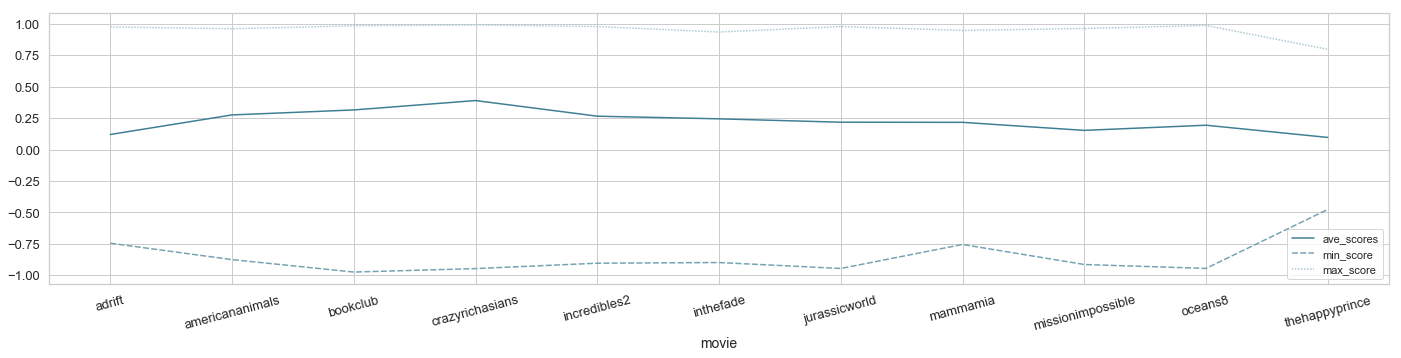

In [10]:
# Get dataframe for plotting scores for each movie.
index = df_movie_sentiment['movie']
data = []
for i, row in df_movie_sentiment.iterrows():
    data.append([row['ave_scores'], row['min_scores'], row['max_scores']])
df_movie_sentiment_plot = pd.DataFrame(data, index, ['ave_scores', 'min_score', 'max_score'])

plot_line_plot(df_movie_sentiment_plot)

Based on the above plot,
1. Crazy rich asians has the highest average sentiment score.
2. The Bookclub has the lowest minimum sentiment score.
3. Most of the movies has at least one pretty high score while crazy rich asians still has the highest maximum score.
4. Interestingly The Happy Prince has the lowest maximum score and highest minimum score.

### Top Positive, Neutral and Negative Words in Tweets

With the sentiment scores generated by VADER, we can also quickly explore what are the top positive, neutral and negative words in tweets.

In [11]:
# TODO

### Top Words used to Describe Different Emotions

We can also analyze which are the top words used to describe different emotions.

In [12]:
# TODO

Up until now we directly inspect & utilize sentiment socres from VADER.

However as we want to classify the sentiment into 5 groups, negative, somewhat negative, neutral, somewhat positive & positive, let's see the histogram of scores and see if there's any intuitive way to group them.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


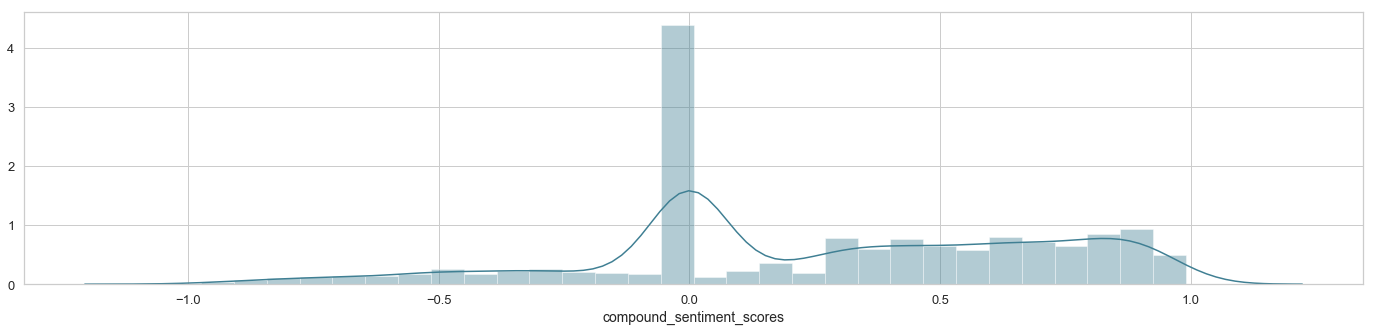

In [13]:
plot_dist_plot(df['compound_sentiment_scores'])

Looking at the above histogram, there are a lot of scores closed to 0, which apparently can be classified as 'neutral'.

Intuitively, we classify them into 5 groups using three threshold -0.5, 0 & 0.5. The groups are, negative, somewhat negative, neutral, somewhat positve & positive.

In [14]:
def apply_sentiment_class(x):
    if x == 0:
        return 'neutral'
    elif x > 0 and x <= 0.5:
        return 'somewhat positive'
    elif x > 0.5 and x <= 1:
        return 'positive'
    elif x < 0 and x >= -0.5:
        return 'somewhat negative'
    else:
        return 'negative'
    
df['semtiment_class'] = df['compound_sentiment_scores'].apply(apply_sentiment_class)

df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores,Has_predefined_movies_strs,semtiment_class
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,['oceans8'],neutral


The lables are now saved in 'semtiment_class' column.

With the label generated using VADER. We can use them to train our own models with supervised learning.

### Prepare functions for Preprocessing Features

As we would like to predict sentiment with tweets. Our features would be tweets and target would be sentiment labels we acquired using VADER.

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

max_fatures = 2000

# Let's tranform all tweets, the feature, to lower case first.
df['Tweets_lower'] = df['Tweets'].apply(lambda x: x.lower())

# and also encode sentiment class, our target
label_encoder = LabelEncoder()
df['semtiment_class_encoded'] = label_encoder.fit_transform(df['semtiment_class'])

le_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(le_map)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


{0: 'negative', 1: 'neutral', 2: 'positive', 3: 'somewhat negative', 4: 'somewhat positive'}


In [16]:
# define feature & target
features = 'Tweets_lower'
target = 'semtiment_class_encoded'

In [17]:
def get_word_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_character_level_X(df, features):
    X = df[features].values
    X = char_arrs = [[c for c in x] for x in X]
    
    tokenizer = Tokenizer(char_level = True)
    tokenizer.fit_on_texts(char_arrs)
    
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_y(df, target):
    y = to_categorical(df[target])
    
    print('Shape of y: ', y.shape)
    
    return y

### Prepare functions for Scoring & Reporting

As the problem is a text classification problem and we report confusion matrix for each model.

In [18]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    
    
    cm = confusion_matrix(y_test_decoded, y_pred)
    labels = [le_map[i] for i in range(len(le_map))]
    
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
        
    ax = get_sub_plot()
    sns.heatmap(df_cm, cmap = palette, annot = True, ax = ax)
    plt.show()
        
    return (score, acc)

### Prepare functions for Modeling

#### We will first try the following models:
1. Long Short-Term Memory (LSTM)
  * Long Short-Term Memory or LSTM is a type of recurrent neural networks (RNN) which is capable of learning and remembering over long sequences of inputs.
  * ![LSTM](https://raw.githubusercontent.com/nicolechao/springboard-data-science/master/Capstone%202/Images/LSTM.png)
2. Multiplicative Long-Short Term Memory (mLSTM)
  * Multiplicative LSTM or mLSTM is a type of recurrent neural network that combines the long short-term memory (LSTM) and multiplicative recurrent neural network (mRNN).
  * mRNN architecture is like: ![mRNN](https://raw.githubusercontent.com/nicolechao/springboard-data-science/master/Capstone%202/Images/mRNN.png)
3. Convolutional Neural Network (CNN)
  * Convolutional neural network or CNN is a type of deep neural networks that utilizes layers with convolving filters that are applied to local features.
  * ![CNN](https://raw.githubusercontent.com/nicolechao/springboard-data-science/master/Capstone%202/Images/CNN.png)
4. Temporal Convolutional Network (TCN)
  * Temporal convolutional network or TCN is a deep neural netowkrs that combines the convolutional neural network and recurrent architectures.
  * ![TCN](https://raw.githubusercontent.com/nicolechao/springboard-data-science/master/Capstone%202/Images/TCN.png)


#### References:
1. LSTM
 * Paper: [Long Short-Term Memory](https://www.bioinf.jku.at/publications/older/2604.pdf)
2. mLSTM:
 * Paper: [Learning to Generate Reviews and Discovering Sentiment](https://arxiv.org/pdf/1704.01444.pdf)
 * Paper: [Multiplicative LSTM for Sequence Modeling](https://arxiv.org/pdf/1609.07959.pdf)
 * Code: https://github.com/titu1994/Keras-Multiplicative-LSTM
3. mRNN
 * Paper: [Generating Text with Recurrent Neural Networks](https://www.cs.utoronto.ca/~ilya/pubs/2011/LANG-RNN.pdf)
4. CNN:
 * Paper: [Convolutional Neural Networks for Sentence Classification](https://www.aclweb.org/anthology/D14-1181)
5. TCN:
 * Paper: [An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling](https://arxiv.org/pdf/1803.01271.pdf)
 * Code: https://github.com/philipperemy/keras-tcn

#### Train-Test-Split
And use train_test_split to do train-test split.


In [19]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['WORD', 'CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'TCN':
        i = Input(shape = (X.shape[1], ))
        o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(5, activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
            
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    if model_mode == 'TCN':
        y_pred_prob = model.predict(X_test)    
        y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    else:
        y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes(data, features, target, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features, target = target)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

### Modeling

Let's try both word-level and character-level on LSTM, mLSTM, CNN & TCN.

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 52, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 17s - loss: 1.3536 - acc: 0.4423
Epoch 2/10
 - 20s - loss: 1.0516 - acc: 0.5965
Epoch 3/10
 - 16s - loss: 0.8369 - acc: 0.6896
Epoch 4/10
 - 16s - loss: 0.7074 - acc: 0.7485
Epoch

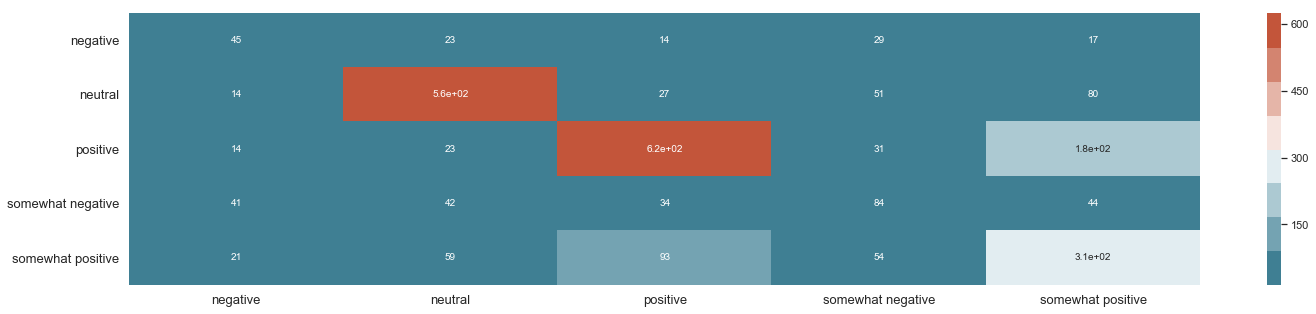

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: mLSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 52, 128)           0         
_________________________________________________________________
multiplicative_lstm_1 (Multi (None, 196)               318500    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 985       
Total params: 575,485
Trainable params: 575,485
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 25s - loss: 1.3727 - acc: 0.4333
Epoch 2/10
 - 21s - loss: 1.0111 - acc: 0.6178
Epoch 3/10
 - 21s - loss: 0.7757 - acc: 0.7121
Epoch 4/10
 - 21s - loss: 0.6640 - acc: 0.7583
Epoc

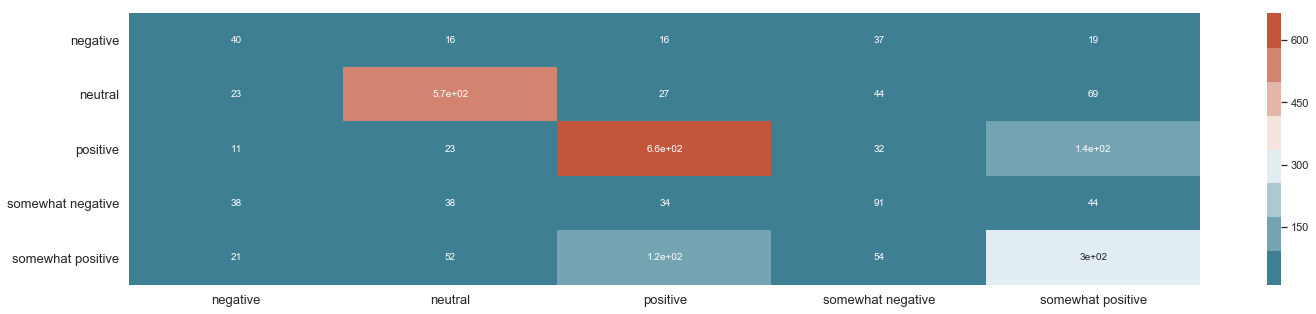

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 52, 64)            24640     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 52, 32)            6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 52, 16)            1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 832)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 832)               0         
_________________________________________________________________
dense_3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Epoch 1/10
 - 4s - loss: 1.3606 - acc: 0.4477
Epoch 2/10
 - 3s - loss: 1.0348 - acc: 0.6127
Epoch 3/10
 - 3s - loss: 0.7995 - acc: 0.7051
Epoch 4/10
 - 3s - loss: 0.6470 - acc: 0.7705
Epoch 5/10
 - 3s - loss: 0.5148 - acc: 0.8207
Epoch 6/10
 - 3s - loss: 0.4088 - acc: 0.8614
Epoch 7/10
 - 3s - loss: 0.3450 - acc: 0.8812
Epoch 8/10
 - 3s - loss: 0.2946 - acc: 0.8992
Epoch 9/10
 - 3s - loss: 0.2302 - acc: 0.9282
Epoch 10/10
 - 3s - loss: 0.1992 - acc: 0.9382
score: 2.16
acc: 0.54


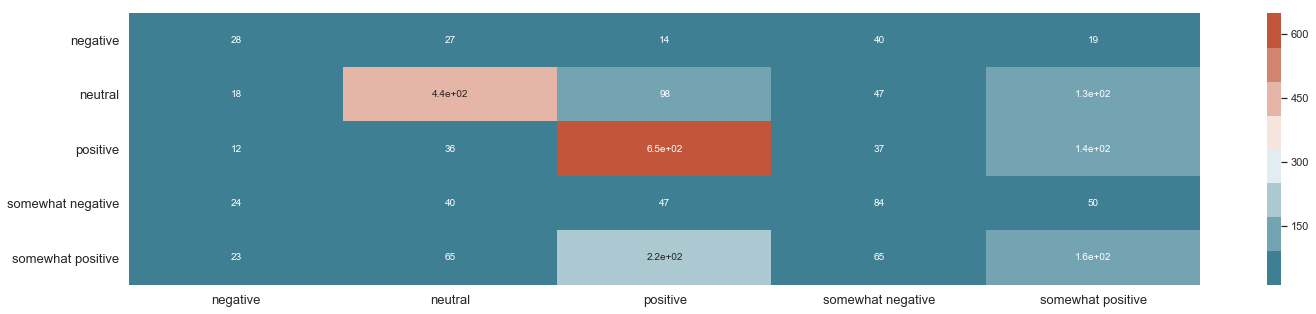

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 52)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 52, 128)      256000      input_1[0][0]                    
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, 52, 64)       8256        embedding_4[0][0]                
__________________________________________________________________________________________________
TCN_1_dilated_conv_1_tanh_s0 (C (None, 52, 64)       8256        TCN_1_initial_conv[0][0]         
________________________________________

Epoch 1/10
 - 41s - loss: 1.5680 - acc: 0.3072
Epoch 2/10
 - 35s - loss: 1.4882 - acc: 0.3438
Epoch 3/10
 - 37s - loss: 1.3381 - acc: 0.4789
Epoch 4/10
 - 36s - loss: 1.1895 - acc: 0.5536
Epoch 5/10
 - 36s - loss: 1.0948 - acc: 0.5969
Epoch 6/10
 - 37s - loss: 1.0354 - acc: 0.6274
Epoch 7/10
 - 36s - loss: 0.9777 - acc: 0.6640
Epoch 8/10
 - 36s - loss: 0.9299 - acc: 0.6789
Epoch 9/10
 - 36s - loss: 0.8948 - acc: 0.6845
Epoch 10/10
 - 36s - loss: 0.8571 - acc: 0.6996
score: 1.07
acc: 0.63


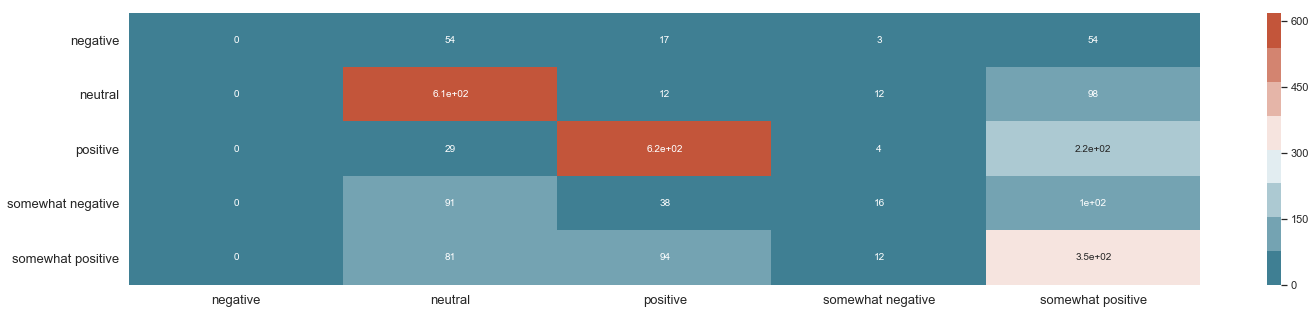

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 338, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 113s - loss: 1.4574 - acc: 0.3499
Epoch 2/10
 - 114s - loss: 1.4289 - acc: 0.3673
Epoch 3/10
 - 112s - loss: 1.4206 - acc: 0.3701
Epoch 4/10
 - 110s - loss: 1.4140 - acc: 0.3777


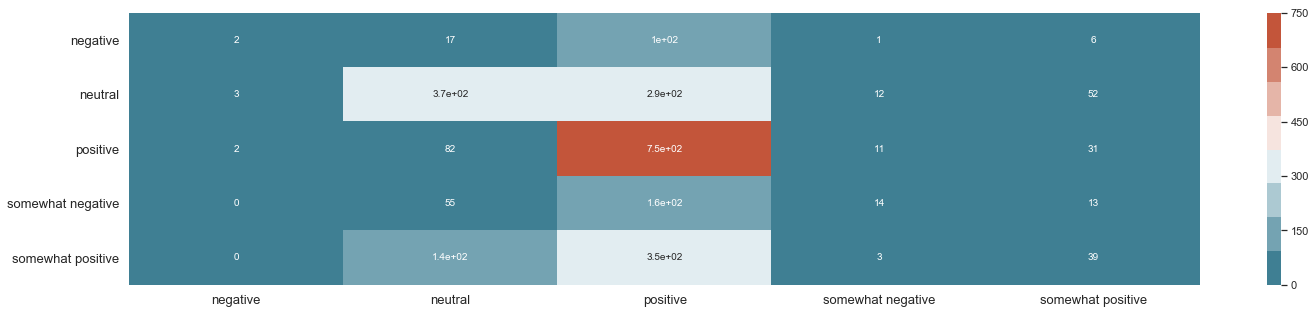

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: mLSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 338, 128)          0         
_________________________________________________________________
multiplicative_lstm_2 (Multi (None, 196)               318500    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 985       
Total params: 575,485
Trainable params: 575,485
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 141s - loss: 1.4590 - acc: 0.3523
Epoch 2/10
 - 138s - loss: 1.4247 - acc: 0.3699
Epoch 3/10
 - 142s - loss: 1.4174 - acc: 0.3718
Epoch 4/10
 - 137s - loss: 1.4140 - acc: 0.3802

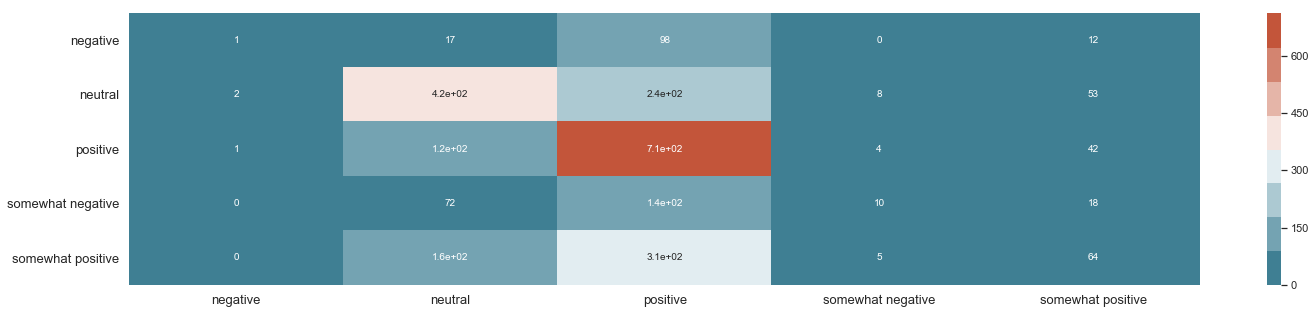

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 338, 64)           24640     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 338, 32)           6176      
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 338, 16)           1552      
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_

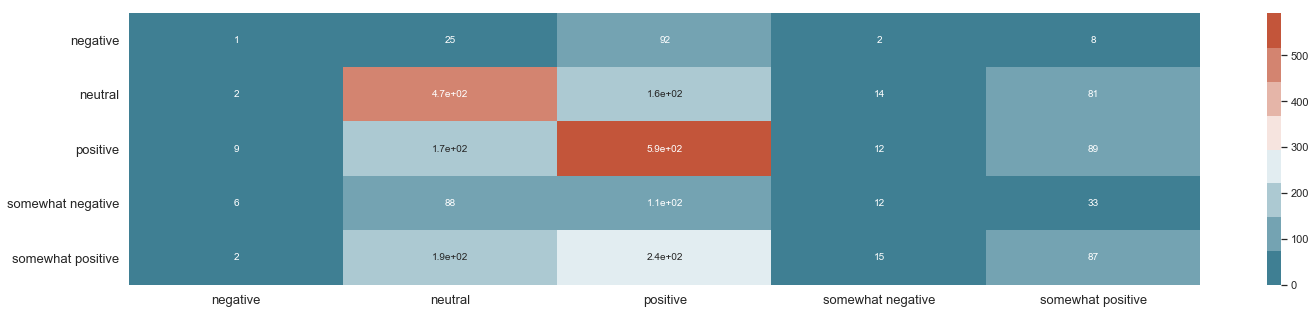

Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 338)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 338, 128)     256000      input_2[0][0]                    
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, 338, 64)      8256        embedding_8[0][0]                
__________________________________________________________________________________________________
TCN_1_dilated_conv_1_tanh_s0 (C (None, 338, 64)      8256        TCN_1_initial_conv[0][0]         
_______________________________________

Epoch 1/10
 - 216s - loss: 1.5716 - acc: 0.2869
Epoch 2/10
 - 212s - loss: 1.5076 - acc: 0.3174
Epoch 3/10
 - 211s - loss: 1.4822 - acc: 0.3160
Epoch 4/10
 - 209s - loss: 1.4652 - acc: 0.3317
Epoch 5/10
 - 209s - loss: 1.4573 - acc: 0.3372
Epoch 6/10
 - 209s - loss: 1.4538 - acc: 0.3425
Epoch 7/10
 - 209s - loss: 1.4519 - acc: 0.3421
Epoch 8/10
 - 211s - loss: 1.4542 - acc: 0.3483
Epoch 9/10
 - 209s - loss: 1.4507 - acc: 0.3507
Epoch 10/10
 - 208s - loss: 1.4502 - acc: 0.3521
score: 1.44
acc: 0.35


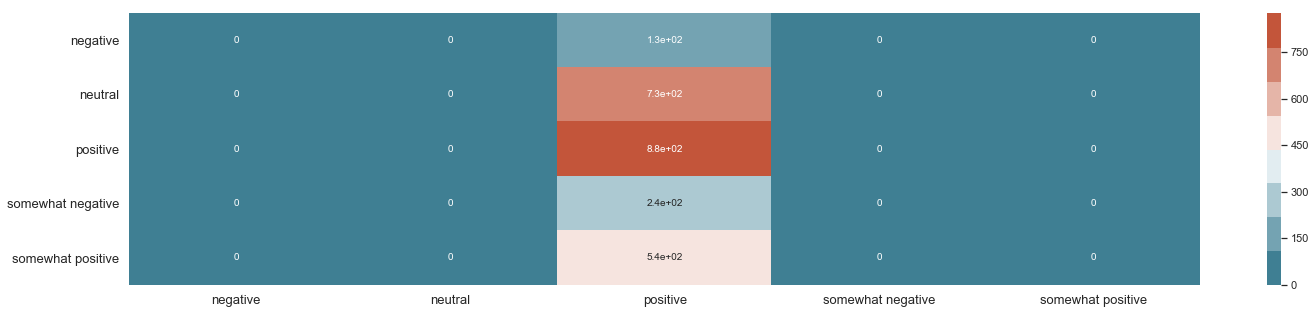

In [20]:
scores, accs = try_all_modes(data = df, features = features, target = target, model_func = model_lstm_mlstm_cnn_tcn)

In [21]:
def cmp_scores_and_accuracies(scores, accs):
    scoresDf = pd.DataFrame(list(scores.items()))
    scoresDf.columns = ['Modes', 'Score']
    accDf = pd.DataFrame(list(accs.items()))
    accDf.columns = ['Modes', 'Accuracy']
    
    print('Scores:')
    print(scoresDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Score', data = scoresDf)
    
    print('Accuracies:')
    print(accDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Accuracy', data = accDf)

Scores:
           Modes     Score
0   (WORD, LSTM)  1.238580
1  (WORD, mLSTM)  1.345929
2    (WORD, CNN)  2.162855
3    (WORD, TCN)  1.072425
4   (CHAR, LSTM)  1.346518
5  (CHAR, mLSTM)  1.320993
6    (CHAR, CNN)  1.433519
7    (CHAR, TCN)  1.439094


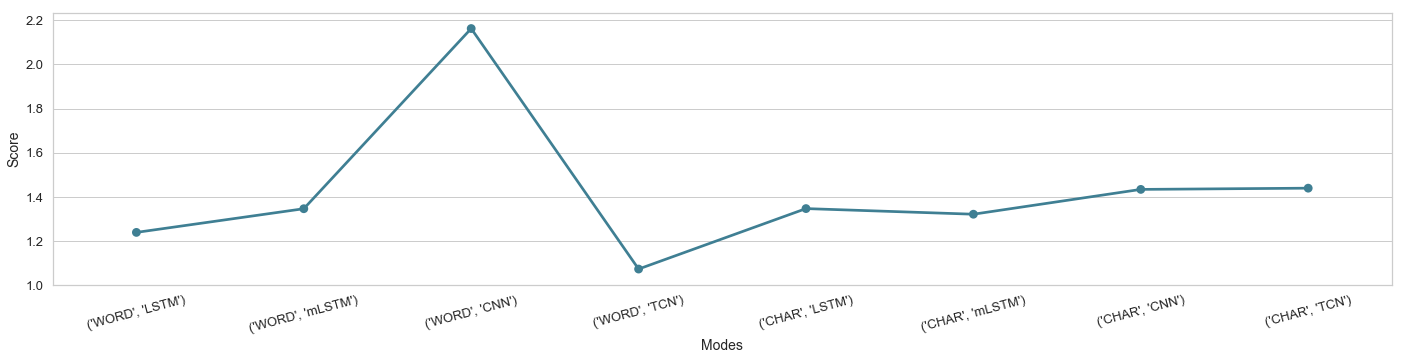

Accuracies:
           Modes  Accuracy
0   (WORD, LSTM)  0.645353
1  (WORD, mLSTM)  0.659651
2    (WORD, CNN)  0.540508
3    (WORD, TCN)  0.633042
4   (CHAR, LSTM)  0.466640
5  (CHAR, mLSTM)  0.481334
6    (CHAR, CNN)  0.462272
7    (CHAR, TCN)  0.347498


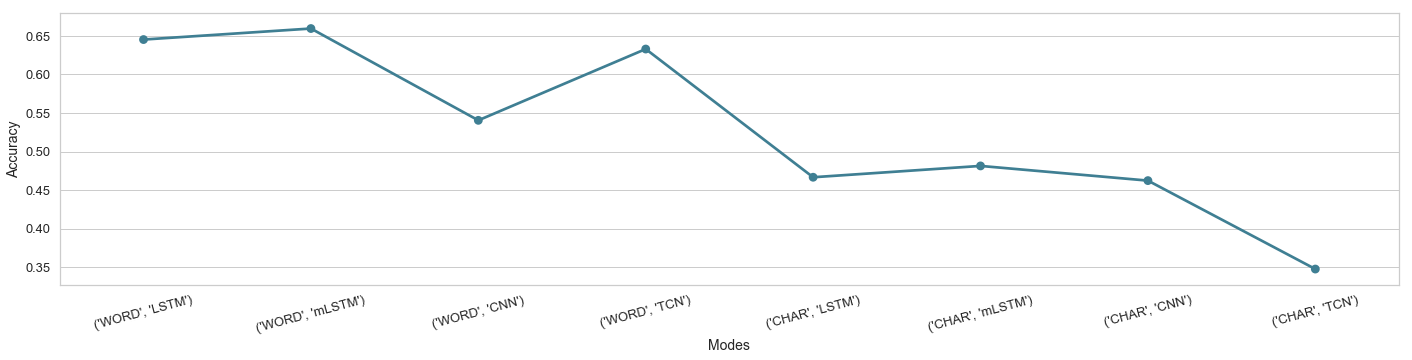

In [22]:
cmp_scores_and_accuracies(scores, accs)

According to the training process and scores/accuracy plots, for word-level modeling,
1. mLSTM has the best accuracies.
2. mLSTM performs better than LSTM.
3. TCN performs better than CNN.

In addition, in general word-level accuracies are better than character-level.

Not sure if for character-level, it would be better to predict next word first and then predict sentiment. Let's try it out.

### Modeling Next Character with Charaters First & Use Hidden Layer to train another Classifier for Sentiment

Let's first train a model to predict next characters first:

In [23]:
# define feature & target
features = 'Tweets_lower'

In [24]:
def get_next_character_model_X_and_y(tweets):
    text = ''

    for tweet in tweets:
        for token in tweet:
            text += token + ' '

    chars = sorted(list(set(text)))
    char2idMap = dict((c, i) for i, c in enumerate(chars))
    id2charMap = dict((i, c) for i, c in enumerate(chars))

    print("Total ", len(chars), ' characters.')
    
    seq_len, step = 40, 10

    sentences, next_chars = [], []

    for i in range(0, len(text) - seq_len, step):
        sentences.append(text[i: i + seq_len])
        next_chars.append(text[i + seq_len])

    print("Total ", len(sentences), ' data points.')
    
    X = np.zeros((len(sentences), seq_len, len(chars)), dtype = np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype = np.bool)

    for i, sentence in enumerate(sentences):
        for j, char in enumerate(sentence):
            X[i, j, char2idMap[char]] = 1
        y[i, char2idMap[next_chars[i]]] = 1
        
    print('Shape of X: ', X.shape)
    print('Shape of y: ', y.shape)
        
    return X, y

In [25]:
def score_and_report_next_char(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    
    
    cm = confusion_matrix(y_test_decoded, y_pred)
    print(cm)
    
    return (score, acc)

In [26]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D, SpatialDropout2D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn_next_char(model_mode, text_mode, data, features):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return

    # preprocess data
    if text_mode == 'CHAR':
        tweets = list(df[features])
        X, y = get_next_character_model_X_and_y(tweets)
    
    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (X.shape[1], X.shape[2])))
        model.add(Dense(X.shape[2], activation = 'softmax'))        
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (X.shape[1], X.shape[2])))
        model.add(Dense(X.shape[2], activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Convolution1D(64, 3, border_mode = 'same', input_shape = (X.shape[1], X.shape[2])))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(X.shape[2], activation = 'softmax'))
    elif model_mode == 'TCN':
        i = Input(shape = (X.shape[1], X.shape[2]))
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(X.shape[2], activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
            
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    if model_mode == 'TCN':
        y_pred_prob = model.predict(X_test)    
        y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    else:
        y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report_next_char(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes_next_char(data, features, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

In [27]:
scores, accs = try_all_modes_next_char(data = df, features = features, model_func = model_lstm_mlstm_cnn_tcn_next_char)

Total  212  characters.
Total  222368  data points.
Shape of X:  (222368, 40, 212)
Shape of y:  (222368, 212)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 196)               320656    
_________________________________________________________________
dense_13 (Dense)             (None, 212)               41764     
Total params: 362,420
Trainable params: 362,420
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 362s - loss: 2.8088 - acc: 0.2272
Epoch 2/10
 - 357s - loss: 2.4265 - acc: 0.3245
Epoch 3/10
 - 356s - loss: 2.3452 - acc: 0.3475
Epoch 4/10
 - 355s - loss: 2.1892 - acc: 0.3871
Epoch 5/10
 - 356s - loss: 2.1106 - acc: 0.4079
Epoch 6/10
 - 360s - loss: 2.0448 - acc: 0.4257
Epoch 7/10
 - 358s - loss: 1.9945 - acc: 0.4371
Epoch 8/10
 - 364s - loss: 1.9575 - acc: 0.4481
Epoch 9/10

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, input_shape=(40, 212), padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Text: CHAR Model: CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 40, 64)            40768     
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 40, 32)            6176      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 40, 16)            1552      
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 180)               115380    
_________________________________________________________________
dropout_10 (Dropout)         (None, 180)              

Epoch 1/10
 - 844s - loss: 3.0357 - acc: 0.1736
Epoch 2/10
 - 834s - loss: 2.6740 - acc: 0.2490
Epoch 3/10
 - 828s - loss: 2.5576 - acc: 0.2805
Epoch 4/10
 - 834s - loss: 2.4808 - acc: 0.3077
Epoch 5/10
 - 836s - loss: 2.4252 - acc: 0.3249
Epoch 6/10
 - 832s - loss: 2.3804 - acc: 0.3381
Epoch 7/10
 - 827s - loss: 2.3512 - acc: 0.3469
Epoch 8/10
 - 833s - loss: 2.3256 - acc: 0.3528
Epoch 9/10
 - 829s - loss: 2.3050 - acc: 0.3583
Epoch 10/10
 - 829s - loss: 2.2845 - acc: 0.3640
score: 2.12
acc: 0.40
[[9622    0    0 ...    0    0    0]
 [ 242    0    0 ...    0    0    0]
 [  25    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


Scores:
           Modes     Score
0   (CHAR, LSTM)  1.804804
1  (CHAR, mLSTM)  1.721346
2    (CHAR, CNN)  2.196346
3    (CHAR, TCN)  2.122367


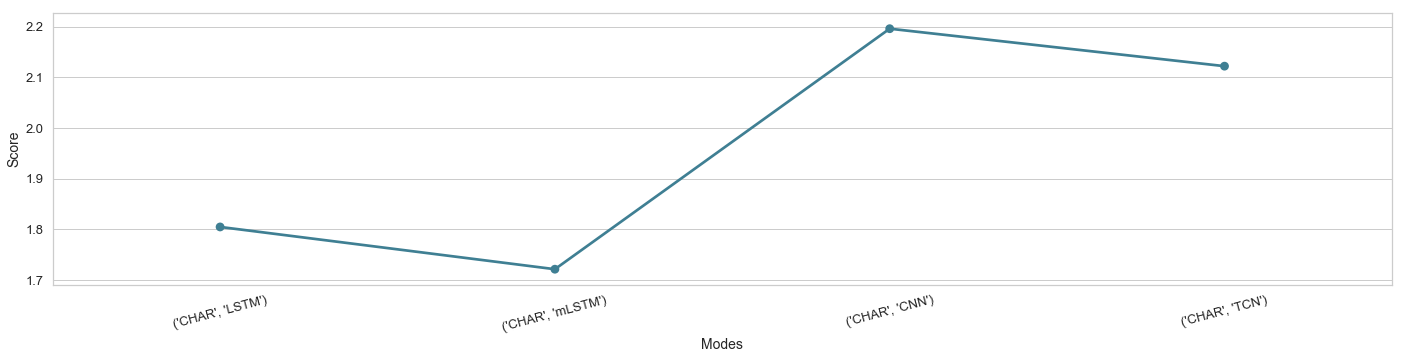

Accuracies:
           Modes  Accuracy
0   (CHAR, LSTM)  0.491360
1  (CHAR, mLSTM)  0.516094
2    (CHAR, CNN)  0.389728
3    (CHAR, TCN)  0.399471


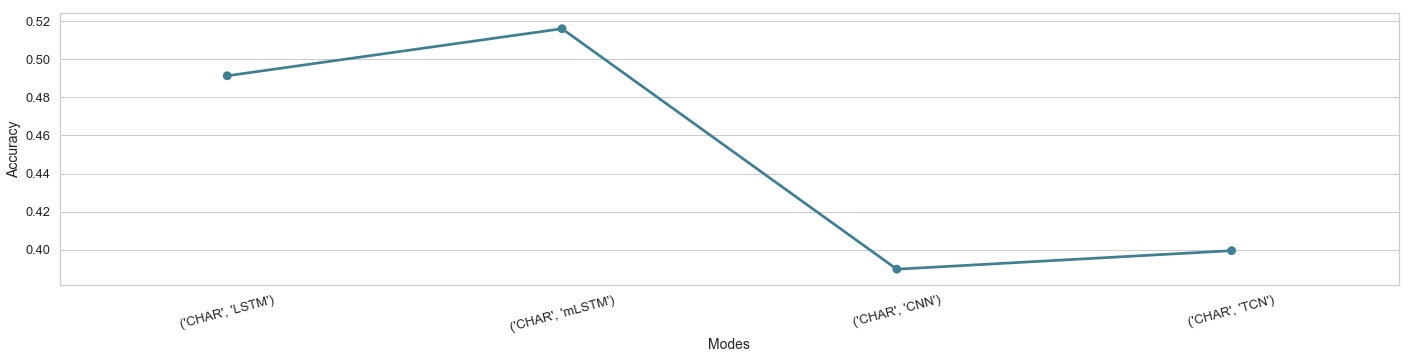

In [28]:
cmp_scores_and_accuracies(scores, accs)

Here we can see that mLSTM has the best accuracy to predict next character.

And then let's try to train a model to predict next charaters & sentiment together, i.e., we use the hidden state of model of predicting next charaters to train another classifier together to predict sentiment.

In [29]:
# define feature & target
features = 'Tweets_lower'
target = 'semtiment_class_encoded'

In [30]:
def get_next_character_sentiment_model_X_and_y(features_tweets, target_sentiments):
    text = ''

    for tweet in features_tweets:
        for token in tweet:
            text += token + ' '

    chars = sorted(list(set(text)))
    char2idMap = dict((c, i) for i, c in enumerate(chars))
    id2charMap = dict((i, c) for i, c in enumerate(chars))

    print("Total ", len(chars), ' characters.')

    target_sentiment_onehot = to_categorical(target_sentiments)
    
    seq_len, step = 40, 10
    
    sentences, next_chars, sentiments = [], [], []
    
    for tweet, sentiment in zip(features_tweets, target_sentiment_onehot):
        for i in range(0, len(tweet) - seq_len, step):
            sentences.append(tweet[i: i + seq_len])
            next_chars.append(tweet[i + seq_len])
            sentiments.append(sentiment)
            
    print("Total ", len(sentences), ' data points.')
            
    X = np.zeros((len(sentences), seq_len, len(chars)), dtype = np.bool)
    y = np.zeros((len(sentences), len(chars) + len(sentiments[0])), dtype = np.bool)

    for i, sentence in enumerate(sentences):
        for j, char in enumerate(sentence):
            X[i, j, char2idMap[char]] = 1
        y[i, char2idMap[next_chars[i]]] = 1
        y[i, len(chars):] = sentiments[i]
            
    print('Shape of X: ', X.shape)
    print('Shape of y: ', y.shape)
        
    return (X, y, len(chars))

In [31]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report_two_outputs(X_test, y_test, y_pred, model, batch_size):
    results = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    score, acc = results[2], results[5]
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_next_char, y_test_sentiment = y_test[0], y_test[1]
    y_test_sentiment_decoded = [argmax(y_test_sentiment[i]) for i in range(y_test_sentiment.shape[0])]
    
    y_pred_next_char, y_pred_sentiment = y_pred[0], y_pred[1]
    y_pred_sentiment_decoded = [argmax(y_pred_sentiment[i]) for i in range(y_pred_sentiment.shape[0])]
    
    cm = confusion_matrix(y_test_sentiment_decoded, y_pred_sentiment_decoded)
    labels = [le_map[i] for i in range(len(le_map))]
    
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
        
    ax = get_sub_plot()
    sns.heatmap(df_cm, cmap = palette, annot = True, ax = ax)
    plt.show()
    
    return (score, acc)

In [32]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D, SpatialDropout2D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn_next_char_and_sentiment(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return

    # preprocess data
    if text_mode == 'CHAR':
        X, y, n_chars = get_next_character_sentiment_model_X_and_y(list(df[features]), list(df[target]))
    
    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        input_next_char = Input(shape = (X.shape[1], X.shape[2]), name = 'input_next_char')
        lstm, hidden_state, cell_state = LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, name = 'lstm_out_next_char', return_state = True)(input_next_char)
        output_next_char = Dense(X.shape[2], activation = 'softmax', name = 'output_next_char')(lstm)
        
        input_sentiment = cell_state
        output_sentiment = Dense(5, activation = 'softmax', name = 'output_sentiment')(input_sentiment)
        
        model = Model(inputs = input_next_char, outputs = [output_next_char, output_sentiment])
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        input_next_char = Input(shape = (X.shape[1], X.shape[2]), name = 'input_next_char')
        lstm, hidden_state, cell_state = MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, name = 'mlstm_out_next_char', return_state = True)(input_next_char)
        output_next_char = Dense(X.shape[2], activation = 'softmax', name = 'output_next_char')(lstm)
        
        input_sentiment = cell_state
        output_sentiment = Dense(5, activation = 'softmax', name = 'output_sentiment')(input_sentiment)
        
        model = Model(inputs = input_next_char, outputs = [output_next_char, output_sentiment])        
    elif model_mode == 'CNN':
        input_next_char = Input(shape = (X.shape[1], X.shape[2]), name = 'input_next_char')
        o = Convolution1D(64, 3, border_mode = 'same')(input_next_char)
        o = Convolution1D(32, 3, border_mode = 'same')(o)
        o = Convolution1D(16, 3, border_mode = 'same')(o)
        o = Flatten()(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        output_next_char = Dense(X.shape[2], activation = 'softmax', name = 'output_next_char')(o)
        
        input_sentiment = o
        output_sentiment = Dense(5, activation = 'softmax', name = 'output_sentiment')(input_sentiment)
        
        model = Model(inputs = input_next_char, outputs = [output_next_char, output_sentiment])
    elif model_mode == 'TCN':
        input_next_char = Input(shape = (X.shape[1], X.shape[2]), name = 'input_next_char')
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(input_next_char)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(X.shape[2], activation = 'softmax')(o)
        output_next_char = Dense(X.shape[2], activation = 'softmax', name = 'output_next_char')(o)
        
        input_sentiment = o
        output_sentiment = Dense(5, activation = 'softmax', name = 'output_sentiment')(input_sentiment)
        
        model = Model(inputs = input_next_char, outputs = [output_next_char, output_sentiment])
        
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = {'output_next_char': 'categorical_crossentropy',
                          'output_sentiment': 'categorical_crossentropy'},
                  optimizer = 'adam',
                  metrics = ['accuracy', 'accuracy'])
                      
    print(model.summary())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
    
    y_train_next_char, y_train_sentiment = y_train[:, 0:n_chars], y_train[:, n_chars:]
    y_test_next_char, y_test_sentiment = y_test[:, 0:n_chars], y_test[:, n_chars:]
              
    batch_size = 32
    
    model.fit(X_train, [y_train_next_char, y_train_sentiment], epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    y_pred = model.predict(X_test)
    
    score, acc = score_and_report_two_outputs(X_test, [y_test_next_char, y_test_sentiment], y_pred, model, batch_size)
    
    return (score, acc)

Total  212  characters.
Total  84220  data points.
Shape of X:  (84220, 40, 212)
Shape of y:  (84220, 217)
Text: CHAR Model: LSTM
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_next_char (InputLayer)    (None, 40, 212)      0                                            
__________________________________________________________________________________________________
lstm_out_next_char (LSTM)       [(None, 196), (None, 320656      input_next_char[0][0]            
__________________________________________________________________________________________________
output_next_char (Dense)        (None, 212)          41764       lstm_out_next_char[0][0]         
__________________________________________________________________________________________________
output_sentiment (Dense)        (None, 5)            985         lstm_out_next

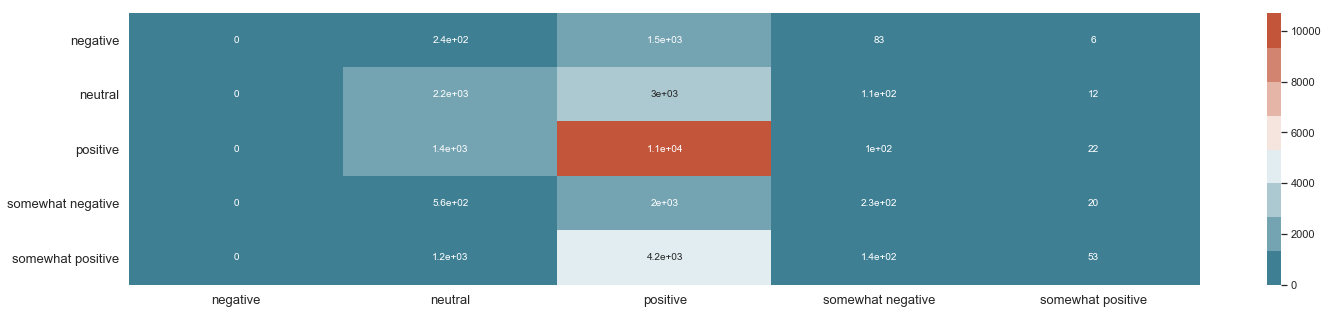

Total  212  characters.
Total  84220  data points.
Shape of X:  (84220, 40, 212)
Shape of y:  (84220, 217)
Text: CHAR Model: mLSTM
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_next_char (InputLayer)    (None, 40, 212)      0                                            
__________________________________________________________________________________________________
mlstm_out_next_char (Multiplica [(None, 196), (None, 400820      input_next_char[0][0]            
__________________________________________________________________________________________________
output_next_char (Dense)        (None, 212)          41764       mlstm_out_next_char[0][0]        
__________________________________________________________________________________________________
output_sentiment (Dense)        (None, 5)            985         mlstm_out_ne

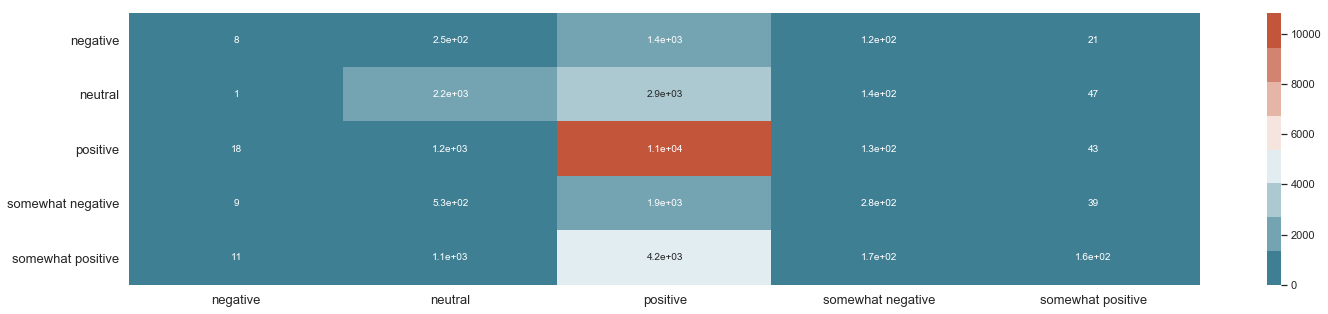

Total  212  characters.
Total  84220  data points.
Shape of X:  (84220, 40, 212)
Shape of y:  (84220, 217)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Text: CHAR Model: CNN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_next_char (InputLayer)    (None, 40, 212)      0                                            
__________________________________________________________________________________________________
conv1d_64 (Conv1D)              (None, 40, 64)       40768       input_next_char[0][0]            
__________________________________________________________________________________________________
conv1d_65 (Conv1D)              (None, 40, 32)       6176        conv1d_64[0][0]                  
__________________________________________________________________________________________________
conv1d_66 (Conv1D)              (None, 40, 16)       1552        conv1d_65[0][0]                  
_______________________________________________________________________________________

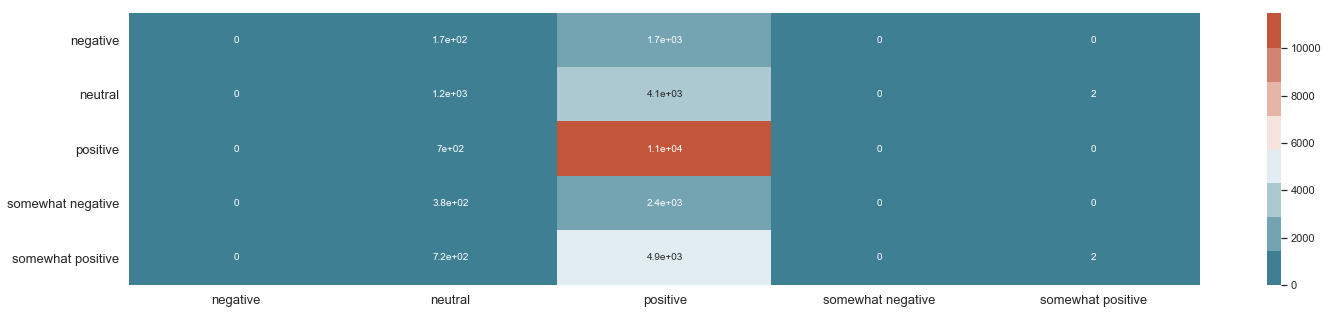

Total  212  characters.
Total  84220  data points.
Shape of X:  (84220, 40, 212)
Shape of y:  (84220, 217)
Text: CHAR Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_next_char (InputLayer)    (None, 40, 212)      0                                            
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, 40, 64)       13632       input_next_char[0][0]            
__________________________________________________________________________________________________
TCN_1_dilated_conv_1_tanh_s0 (C (None, 40, 64)       8256        TCN_1_initial_conv[0][0]         
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 40, 64)       0           TCN_1_dilated_

Epoch 1/10
 - 329s - loss: 5.2999 - output_next_char_loss: 3.8716 - output_sentiment_loss: 1.4283 - output_next_char_acc: 0.1487 - output_next_char_acc_1: 0.1487 - output_sentiment_acc: 0.4356 - output_sentiment_acc_1: 0.4356
Epoch 2/10
 - 316s - loss: 4.6607 - output_next_char_loss: 3.2466 - output_sentiment_loss: 1.4140 - output_next_char_acc: 0.1494 - output_next_char_acc_1: 0.1494 - output_sentiment_acc: 0.4357 - output_sentiment_acc_1: 0.4357
Epoch 3/10
 - 315s - loss: 4.6155 - output_next_char_loss: 3.2015 - output_sentiment_loss: 1.4140 - output_next_char_acc: 0.1494 - output_next_char_acc_1: 0.1494 - output_sentiment_acc: 0.4357 - output_sentiment_acc_1: 0.4357
Epoch 4/10
 - 318s - loss: 4.6036 - output_next_char_loss: 3.1895 - output_sentiment_loss: 1.4140 - output_next_char_acc: 0.1494 - output_next_char_acc_1: 0.1494 - output_sentiment_acc: 0.4357 - output_sentiment_acc_1: 0.4357
Epoch 5/10
 - 315s - loss: 4.5990 - output_next_char_loss: 3.1850 - output_sentiment_loss: 1.414

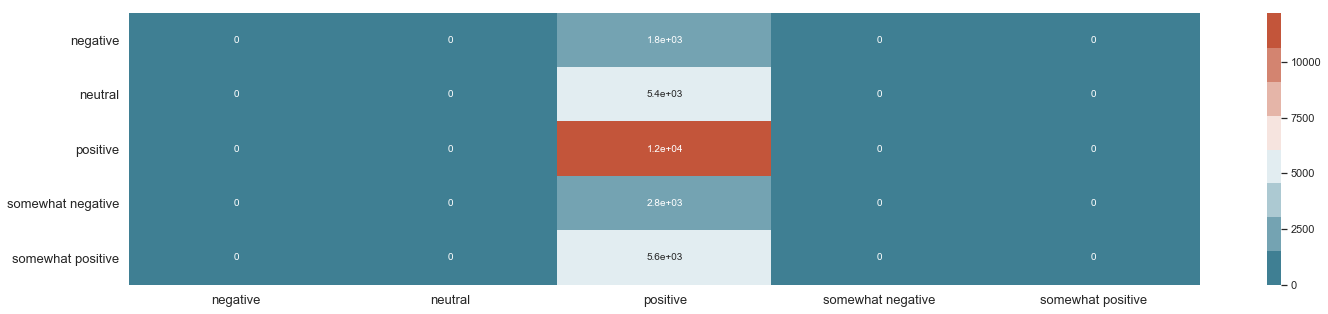

In [33]:
scores, accs = try_all_modes(data = df, features = features, target = target, model_func = model_lstm_mlstm_cnn_tcn_next_char_and_sentiment)

Scores:
           Modes     Score
0   (CHAR, LSTM)  1.327173
1  (CHAR, mLSTM)  1.297797
2    (CHAR, CNN)  1.375025
3    (CHAR, TCN)  1.413282


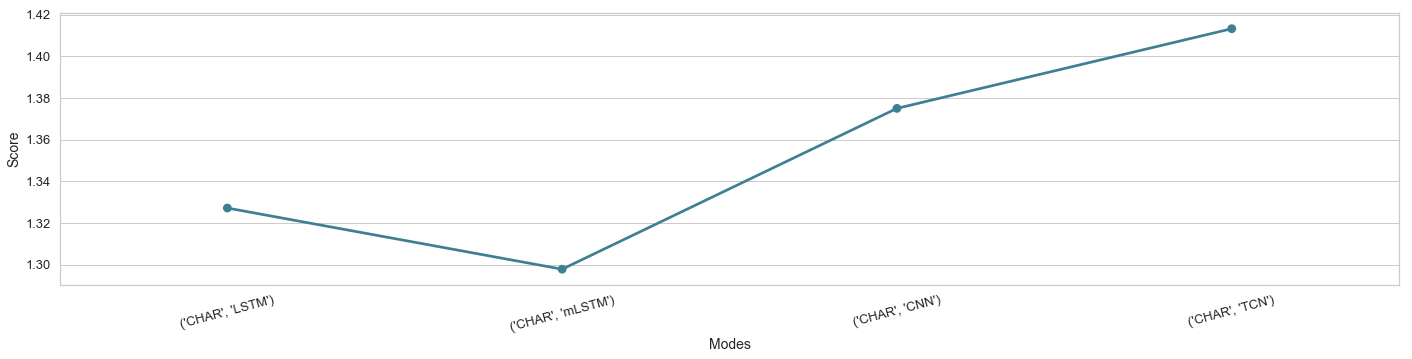

Accuracies:
           Modes  Accuracy
0   (CHAR, LSTM)  0.474760
1  (CHAR, mLSTM)  0.485698
2    (CHAR, CNN)  0.458209
3    (CHAR, TCN)  0.438276


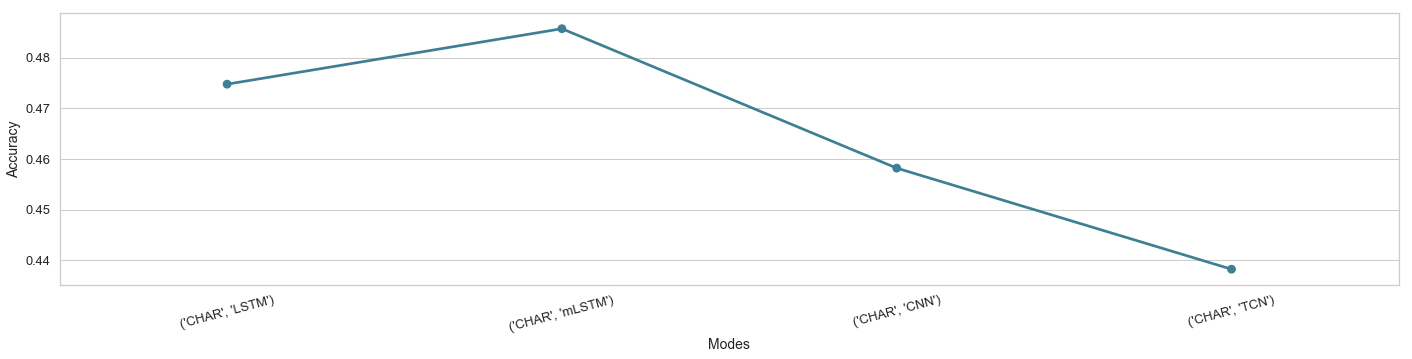

In [34]:
cmp_scores_and_accuracies(scores, accs)

mLSTM has the best accuracy to predict sentiment as well.

In addition, the accuracy is better than directly predciting sentiment with character-level tests.



### Conclusion

1. In general word-level mLSTM has the best accuracies for predicting sentiment.
2. mLSTM also performs well out of total 4 models, LSTM, mLSTM, CNN & TCN when 
 * predicting next character of the texts.
 * predicting sentiment with hidden state of predicting next characeter with character-level texts.
3. Training accuracy is always higher than test accuracy, which can be improved with more data. 

### Next Steps
1. When acquiring labels with VADER, we can try to apply other strategies instead of using hard-coded threshold.
2. Apply dimmensionality reduction on texts to see if accuracies can be further improved.
3. Apply pre-trained model for embedding.
4. Get more data to improve test accuracies.